# Position Encoding in the Transformer Model

Vaswani, Ashish, et al. "Attention is all you need." Advances in Neural Information Processing Systems. 2017. <http://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf>

See equation wihtout number in the middle of page 8. Original implementation: <https://github.com/tensorflow/tensor2tensor/blob/8bdecbe434d93cb1e79c0489df20fee2d5a37dc2/tensor2tensor/layers/common_layers.py#L1106>

Position encodings are summed up with word embeddings before being processed with the self-attentive architecture.

$$\mathrm{pos}(t, i) = 
\begin{cases}
      \sin\left(  {\frac{t}{10^4}}^{\frac{i}{d}} \right), & \text{if }\ i \mod 2 = 0 \\
      \cos\left(  {\frac{t}{10^4}}^{\frac{i - 1}{d}} \right), & \text{otherwise}
    \end{cases}
$$

where $i$ is the dimension in the vector, $d$ is dimensionality of the model, $t$ is the position of the symbol.

In [2]:
import numpy as np

In [11]:
def position_encoding_matrix(max_time, dim):
    vectors_in_time = []
    for time in range(max_time):
        vector = []
        for i in range(dim):
            if i % 2 == 0:
                value = np.sin(time / 10000 ** (i / dim))
            else:
                value = np.cos(time / 10000 ** ((i - 1) / dim))
            vector.append(value)
        vectors_in_time.append(vector)
    return np.array(vectors_in_time)

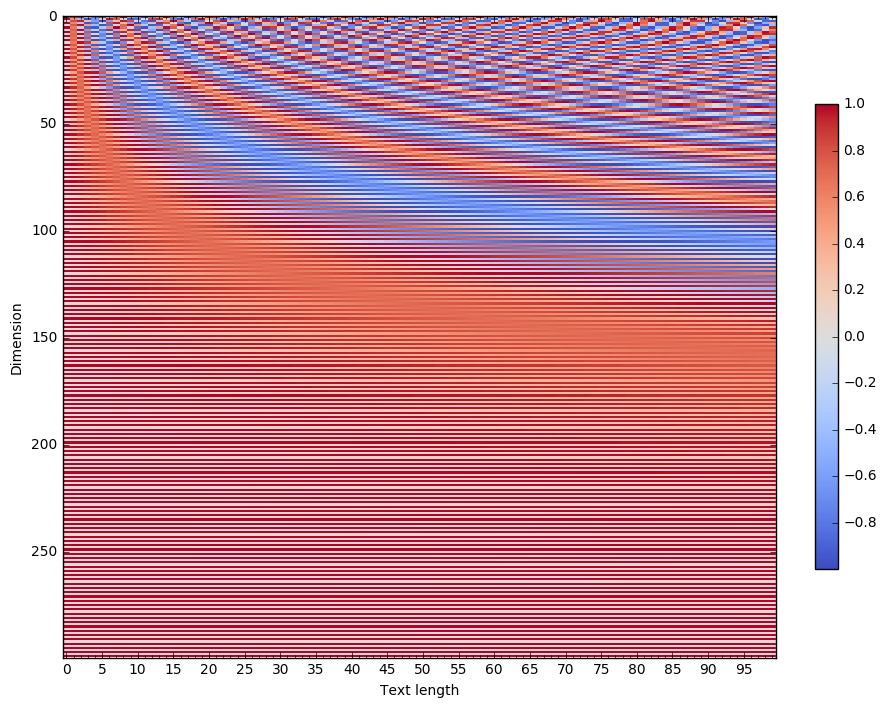

In [24]:
encoding = position_encoding_matrix(100, 300)

import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
f, ax = plt.subplots(1, 1, figsize=(10,10))
heatplot = ax.imshow(encoding.T, aspect=.3, cmap='coolwarm', interpolation='none')

plt.colorbar(heatplot, fraction=0.03)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

ax.set_xlabel('Text length')
ax.set_ylabel('Dimension')
#ax.xaxis.grid(color='w', linestyle='-', linewidth=1, which='minor')

plt.savefig('transformer_pos_encoding.svg')
plt.show()